# Orthonormal Bases for Vector Spaces

### Taylor Simons

### Simple Overview

Orthonormal bases are special types of bases that are mathematically convenient. Bases, in general, help us transform vectors of data into more useful terms. Using an orthonormal basis instead of an non-orthonormal basis can simplify calculations. To understand orthonormal bases, let's first look at vector space bases in general.

#### Vector Space Bases

A vector space basis is a set of vectors that act as "build blocks" to describe every vector in the space. These basis vectors can be combined to represent every possible vector in the entire vector space. Similarly, every vector in the space can be broken down into a unique combination of these basis vectors. In more technical terms, the basis vectors span the vector space and are linearly independent.

Any vector in the vector space can be described in terms of a basis for that space. Since every vector can be formed as a linear combination of the basis vectors, vectors can be represented as a tuple of the coefficients of in the linear combination. For example, let $B = \{\vec{b}_1,\vec{b}_2,\dots,\vec{b}_n,\}$
be a basis for $\mathbb{R}^n$. Then $ v = c_1\vec{b}_1 + c_2\vec{b}_1 + \dots + c_n\vec{b}_n$. This combination of coefficients is unique for every vector $v$. Thus every vector in $\mathbb{R}^n$ can be described uniquely using the coefficients for that basis. 

The coefficients can be formed into a vector, making a coordinate vector: $[v]_B \begin{bmatrix}c_1\\c_2\\\vdots\\c_n\end{bmatrix}$. These coordinate vectors can be used in place of the original vectors, making analysis and computations more convenient. However, relationship between the original vectors do not always remain the same between the coordinate vectors. To ensure that these relationship are preserved, we can use special types of bases, orthonormal bases.

#### Orthonormal Bases

As the name suggests, orthonormal bases are defined as basis with vectors that are both __normalized__ and __orthogonal__ to each other. For a vector to be considered normalized, it must have a norm of one. Vectors in an inner product space are orthogonal to each other if their inner product is zero. In other words, if the basis $B = \{\vec{b}_1,\vec{b}_2,\dots,\vec{b}_n,\}$ then $\|\vec{b}_i\| = 1 $ for each $i$ (normalized) and $\langle \vec{b}_i,\vec{b}_j \rangle = 0$ for every $i$ and $j$ where $i\neq j$ (orthogonal).

Due to these properties, coordinate vectors of orthonormal basis preserve the metric and properties of the original vectors. This means that metrics like angle and distance are the same between coordinate vectors as they are in the original vectors. This way we can use the convenience of a new basis coordinate system without sacrificing meaningful metrics.

### Formal Definition

Let $V$ be an inner product space. Let $B$ be the set vectors $\{\vec{v}_1,\vec{v}_2,\dots,\vec{v}_n\}$. $B$ is an _orthonormal basis_ of $V$ if 
- $B \subset V,$
- $\text{span}(B) =V$
- $ B \text{ is }\text{lin. indep.}$
- $ \langle \vec{v}_i,\vec{v}_j \rangle = 0 \mkern20mu \forall i,j \text{ if } i \neq j$
- $ \|\vec{v}_i\| = 1 \mkern20mu \forall i$

### Metric Preservation

First, let us look at an example that demonstrates how coordinate vectors of orthonormal bases preserve distance and angle measure. Let us take two random vectors in $\mathbb{R}^2$.

In [16]:
import numpy as np
import numpy.linalg as la
dim = 2
v_1 = np.random.rand(dim,1) * np.random.randint(-10,10)
v_2 = np.random.rand(dim,1) * np.random.randint(-10,10)

print('v_1:')
print(v_1)
print('v_2:')
print(v_2)

v_1:
[[-5.73868978]
 [-7.57494056]]
v_2:
[[-2.22140591]
 [-6.846522  ]]


Now let us plot these two vectors:

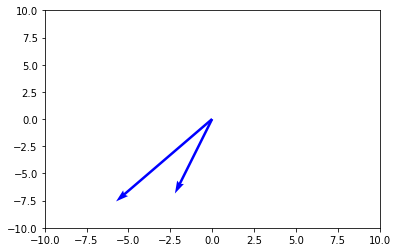

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_vectors(vecs,colors=None):
    x,y = zip(*vecs)
    plt.ylim([-10,10])
    plt.xlim([-10,10])
    x=np.array(x)
    y=np.array(y)
    orig_x,orig_y = x*0,y*0
    plt.quiver(orig_x,orig_y,x,y,color=colors, angles='xy', scale_units='xy', scale=1)
    plt.show()
    
display_vectors([v_1,v_2],['b','b'])

Using Numpy we can produce an orthonormal basis.

b_1: [0.5174179  0.85573285]
b_2: [-0.85573285  0.5174179 ]


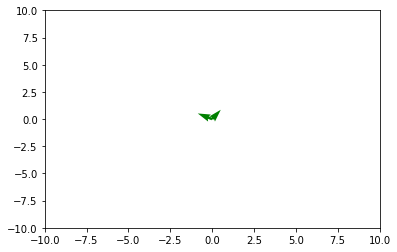

In [18]:
from scipy.stats import ortho_group
B = ortho_group.rvs(2)
b_1 = B[:,0]
b_2 = B[:,1]
print('b_1:',b_1)
print('b_2:',b_2)
display_vectors([b_1,b_2],['g','g'])

Another convenient property of an orthonormal basis is that the change of basis computation is rather simple. Since $B\vec{c} = \vec{v}$ where $B$ is the basis matrix, $\vec{c}$ is the coordinate vector and $\vec{v}$ is the original vector, we can multiply both side by $B^{-1}$ to solve for $\vec{c}$: $\vec{c} =B^{-1}\vec{v}$. If $B$ is orthonormal then, $B^{-1}=B^H$ and $\vec{c} =B^H\vec{v}$. This is demonstrated below. The blue vectors come from the standard basis for $\mathbb{R}^n$ and the red vectors are the coordinate vectors of the generated orthonormal basis.

vb_1:
[[-9.45142631]
 [ 0.99137555]]
vb_2:
[[-7.00818899]
 [-1.64158301]]


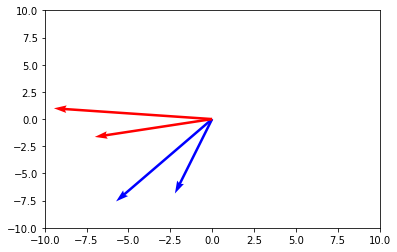

In [19]:
vb_1 = np.matmul(B.T,v_1)
vb_2 = np.matmul(B.T,v_2)
print('vb_1:')
print(vb_1)
print('vb_2:')
print(vb_2)
display_vectors([v_1,v_2,vb_1,vb_2],['b','b','r','r'])

We can see the angle and distance between the two vectors are preserved between the two pairs.

### Data Analysis

We can use a orthonormal basis representation to help better understand noise data. If collected data follows a linear trend, an orthonormal coordinate representation aligned with that trend gives us a convenient way to view the error.

Let's take a look at noisy data that follows a linear trend in $\mathbb{R}^2$.

[[-1.26389241 -0.38769019]
 [ 2.99025855  4.86225471]
 [-3.82316145 -2.36804248]
 [ 0.23015036  0.93869289]
 [ 1.5054273   1.14905839]
 [ 3.24090873  5.38383095]
 [-4.17784265 -4.67499225]
 [ 7.30947968  5.18875769]
 [ 4.98394703  4.65086259]
 [-0.28586018 -2.03638834]]


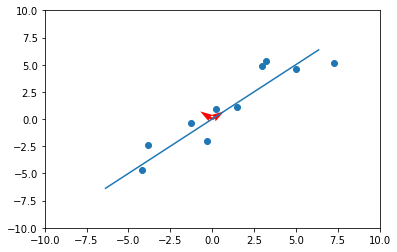

In [26]:
import random

theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
B = np.array(((c,-s), (s, c)))
n = 1000
x = lin = np.linspace(-9,9,n)
line = np.stack((x,x*0),axis=-1)
line = np.matmul(B,line.T).T
noise = np.random.normal(0, 1, line.shape)
data = line + np.random.normal(0, 1, line.shape)
data = data[np.random.choice(range(n),10,replace=True)]
print(data)
plt.scatter(data[:,0],data[:,1])
plt.plot(line[:,0],line[:,1])

end_p = 15
plt.ylim([-end_p,end_p])
plt.xlim([-end_p,end_p])
display_vectors([B[:,0],B[:,1]],['r','r'])
plt.show()

Each point lies close to the solid line with some noise. From this raw data, it is not trivial to calculate the error of each point. However, if we represent this data using an orthonormal basis that is aligned with the fitted line, finding the error for each point becomes trivial. In our case, the rotation matrix used to produce the data is the basis.

$$B = \begin{bmatrix}
cos(\theta) && sin(\theta)\\
-sin(\theta) && cos(\theta)
\end{bmatrix}$$

Below, all the data points are converted to their basis representations.

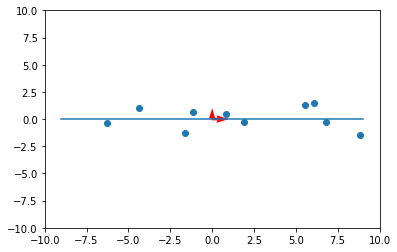

In [27]:
import math
rotated_data = np.matmul(B.T,data.T).T
new_line = np.matmul(B.T,line.T).T
plt.scatter(rotated_data[:,0],rotated_data[:,1])
plt.plot(new_line[:,0],new_line[:,1])

plt.ylim([-end_p,end_p])
plt.xlim([-end_p,end_p])
display_vectors([[1,0],[0,1]],['r','r'])
plt.show()

In this form, the noise for each point is just the value of the $y$ component printed below.

In [28]:
print(rotated_data)

[[-1.16784526  0.61956853]
 [ 5.55256538  1.32370118]
 [-4.37784229  1.02892449]
 [ 0.82649699  0.50101523]
 [ 1.87700483 -0.25199087]
 [ 6.09861192  1.51527483]
 [-6.25989959 -0.35153786]
 [ 8.8375884  -1.4995769 ]
 [ 6.81283922 -0.23552627]
 [-1.64207767 -1.23781033]]
